In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
dat = sm.datasets.get_rdataset("ships",package="MASS")

In [3]:
data = dat.data.copy()

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data

,type,year,period,service,incidents
0,A,60,60,127,0
1,A,60,75,63,0
2,A,65,60,1095,3
3,A,65,75,1095,4
4,A,70,60,1512,6
5,A,70,75,3353,18
6,A,75,60,0,0
7,A,75,75,2244,11
8,B,60,60,44882,39
9,B,60,75,17176,29


In [6]:
data.columns

Index(['type', 'year', 'period', 'service', 'incidents'], dtype='object')

In [7]:
mod1 = smf.glm(formula="incidents ~ C(type) + C(year) + C(period)",
               data=data,
               offset=np.log(data.service+1), 
               family=sm.families.Poisson()).fit()

In [8]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              incidents   No. Observations:                   40
Model:                            GLM   Df Residuals:                       31
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.298
Date:                Mon, 20 Apr 2020   Deviance:                       38.730
Time:                        11:27:28   Pearson chi2:                     42.3
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.4069      0.217    -29.467      0.000      -6.833      -5.981
C(type)[T.B]       -0.5426      0.178     -3.056      0.002      -0.891      -0.195
C(type)[T.C]       -0.6879      0.329     -2.091      0.037      -1.333      -0.043
C(type)[T.D]       -0.0768      0.291     -0.264      0.792      -0.646       0.493
C(type)[T.E]        0.3250      0.236      1.378      0.168      -0.137       0.787
C(year)[T.65]       0.6972      0.150      4.659      0.000       0.404       0.991
C(year)[T.70]       0.8188      0.170      4.824      0.000       0.486       1.151
C(year)[T.75]       0.4533      0.233      1.945      0.052      -0.004       0.910
C(period)[T.75]     0.3846      0.118      3.252      0.001       0.153       0.616
===================================================================================
"""

In [9]:
predictions = mod1.predict(data,offset=np.log(data['service']+1))

In [10]:
predictions

0      0.211216
1      0.155146
2      3.631811
3      5.335400
4      5.661787
5     18.438322
6      0.002597
7      8.563722
8     43.047391
9     24.202266
10    55.103511
11    57.639142
12    15.366520
13    41.857992
14     0.001509
15    15.781669
16     0.978688
17     0.673800
18     1.302463
19     1.656498
20     1.474608
21     5.385377
22     0.001305
23     0.527260
24     0.385108
25     0.237975
26     0.886904
27     0.870122
28     1.212967
29     6.155324
30     0.002405
31     7.249195
32     0.105055
33     0.003355
34     3.623120
35     2.951029
36     5.997442
37    16.449661
38     0.003594
39     2.866744
Name: service, dtype: float64

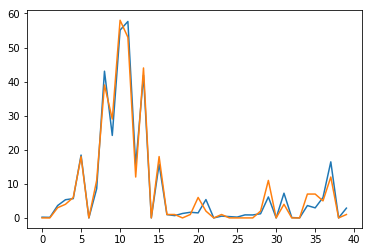

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(predictions)
plt.plot(data.incidents)

In [2]:
pwd

'/data/Dropbox/Teaching/Statistical Risk Analysis/Computer experiments'

[bla](http://www.google.se)